In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import norm, mannwhitneyu, normaltest, ttest_ind, shapiro

In [3]:
# Load MATLAB data
data = scipy.io.loadmat('../Data_example2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Patients', 'TMTa'])

In [4]:
TMTa = data['TMTa']
TMTa = TMTa[~np.isnan(TMTa)]
Patients = data['Patients']

In [5]:
len(TMTa)

21

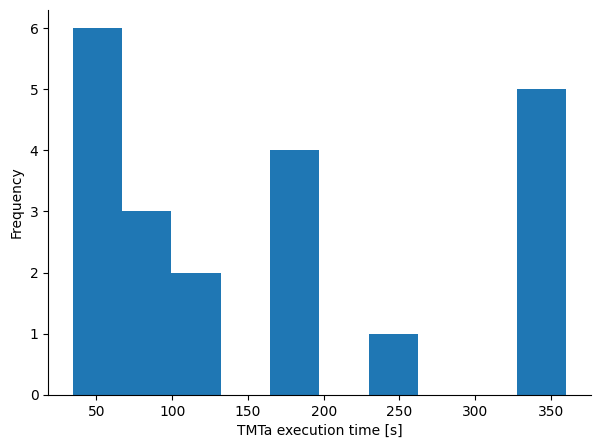

In [9]:
# Visualizzazione preliminare dei dati
fig, ax = plt.subplots(1, figsize = (7,5))
ax.hist(TMTa, bins = 10)
ax.set_xlabel("TMTa execution time [s]")
ax.set_ylabel("Frequency")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [26]:
# Test di normalità: i dati vengono da una distribuzione Gaussiana?
#uso shapiro perchè consigliato per piccoli dataset (n = 23, pochi samples)
#normaltest mi avrebbe dato p_value alto, quindi non potevo rifiutare l'ipotesi nulla H0 di normalità
_,p = shapiro(TMTa)
#_,p = normaltest(TMTa)
p

np.float64(0.0035635768312282136)

In [ ]:
# Divido i due gruppi
TMTa_dem = data['TMTa'][data['Patients'] == 'Dementia']
TMTa_dem = TMTa_dem[~np.isnan(TMTa_dem)]
TMTa_sani = data['TMTa'][data['Patients'] == 'Healthy']
TMTa_sani = TMTa_sani[~np.isnan(TMTa_sani)]
mean_dem = np.nanmean(TMTa_dem)
mean_sani = np.nanmean(TMTa_sani)
dev_dem = np.nanstd(TMTa_dem)
dev_sani = np.nanstd(TMTa_sani)

In [28]:
_,p = shapiro(TMTa_sani)
p

np.float64(0.12084823545653561)

In [29]:
_,p = shapiro(TMTa_dem)
p

np.float64(0.029085546832107085)

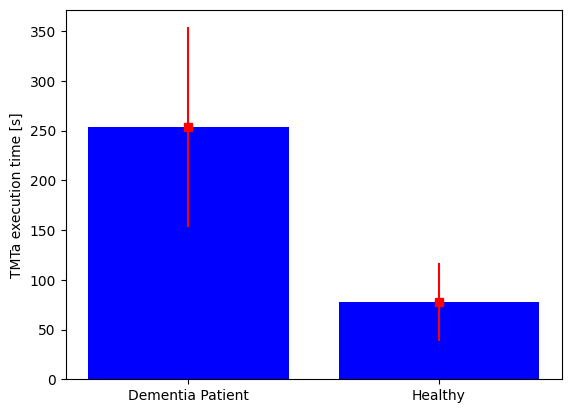

In [16]:
## Visualizzazione dei dati
plt.figure()
plt.bar([1, 2], [mean_dem, mean_sani], color='blue')
plt.errorbar([1, 2], [mean_dem, mean_sani], yerr=[dev_dem, dev_sani], fmt='sr', markerfacecolor='red')
plt.xticks([1, 2], ['Dementia Patient', 'Healthy'])
plt.ylabel('TMTa execution time [s]')
plt.show()

In [24]:
# Effettuo il test opportunamente selezionato
from scipy.stats import ranksums
_, p1 = ranksums(TMTa_sani, TMTa_dem)
p1

np.float64(0.00025051809382168244)

In [30]:
if p1 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")

Reject H0
